In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_parquet("clean_data.v1.parquet")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 30062056 to 4129209
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Процессор_Количество ядер                    933 non-null    float64
 1   Корпус_Материал корпуса_металл               930 non-null    object 
 2   Заводские данные_Страна                      933 non-null    object 
 3   Видеокарта_Графический контроллер_crop       933 non-null    object 
 4   brand_name                                   933 non-null    object 
 5   Заводские данные_Гарантия                    933 non-null    object 
 6   Оперативная память_Оперативная память (RAM)  933 non-null    int64  
 7   Видеокарта_Производитель видеопроцессора     823 non-null    object 
 8   Операционная система_Операционная система    919 non-null    object 
 9   Корпус_Материал корпуса_пластик              930 non-null    obje

In [4]:
df["Процессор_Процессор_crop"]

30062056        Intel Core
30065211        Intel Core
30056687        Intel Core
30064594          Apple M2
30061606        Intel Core
                 ...      
400027919         Apple M2
4183550      Intel Celeron
400027896         Apple M1
400029644         Apple M1
4129209      Intel Celeron
Name: Процессор_Процессор_crop, Length: 933, dtype: object

# Заполним пропущенные значения

In [5]:
df["Оперативная память_Частота памяти"].value_counts()

3200.0    328
2400.0    130
2666.0     78
2133.0     51
2933.0     36
1600.0     30
4266.0     30
4267.0     14
1333.0     11
1866.0     11
3733.0     10
4800.0      5
5200.0      4
3600.0      1
3.0         1
Name: Оперативная память_Частота памяти, dtype: int64

In [6]:
df["Оперативная память_Частота памяти"].fillna(3200, inplace=True)

In [7]:
df["Экран_Частота обновления"].value_counts()

60.0     363
144.0     73
120.0     59
165.0     17
90.0      13
50.0       5
240.0      4
300.0      3
360.0      1
Name: Экран_Частота обновления, dtype: int64

In [8]:
df["Экран_Частота обновления"].fillna(60, inplace=True)


In [9]:
df.fillna("unkonwn", inplace=True)

# Выделим train & test наборы

In [10]:
df_train, df_test = train_test_split(df, random_state=42, test_size=0.2)

In [11]:
y_train = df_train.basePrice
y_test = df_test.basePrice
df_train.drop("basePrice", axis=1, inplace=True)
df_test.drop("basePrice", axis=1, inplace=True)

# Масштабируем числовые переменные

In [12]:
numerical = df_train.select_dtypes(include=[int, float]).columns.tolist()

In [13]:
scaler = StandardScaler()

In [14]:
df_train[numerical] = scaler.fit_transform(df_train[numerical])

In [15]:
df_test[numerical] = scaler.transform(df_test[numerical])

# Преобразуем категориальные фичи

In [16]:
dv = DictVectorizer()

In [17]:
X_train = dv.fit_transform(df_train.to_dict(orient="records"))
X_test = dv.transform(df_test.to_dict(orient="records"))

# Попробуем разные модели

In [18]:
model_linear = Ridge()

In [19]:
model_linear.fit(X_train, y_train)

Ridge()

In [20]:
y_pred_train = model_linear.predict(X_train)
y_pred_test = model_linear.predict(X_test)

print(f"RMSE train = {mean_squared_error(y_train, y_pred_train) ** 0.5}")
print(f"RMSE test  = {mean_squared_error(y_test, y_pred_test) ** 0.5}")

RMSE train = 20850.775954682038
RMSE test  = 34256.083829462186


# Случайный лес

In [21]:
model_forest = RandomForestRegressor(n_estimators=200, random_state=42)

In [22]:
model_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [23]:
y_pred_train = model_forest.predict(X_train)
y_pred_test = model_forest.predict(X_test)

print(f"RMSE train = {mean_squared_error(y_train, y_pred_train) ** 0.5}")
print(f"RMSE test  = {mean_squared_error(y_test, y_pred_test) ** 0.5}")

RMSE train = 10482.209145257875
RMSE test  = 31492.82345230372


# Посмотрим что нам предсказывает модель

In [24]:
sample = df.iloc[[100,101]]
sample

,Процессор_Количество ядер,Корпус_Материал корпуса_металл,Заводские данные_Страна,Видеокарта_Графический контроллер_crop,brand_name,Заводские данные_Гарантия,Оперативная память_Оперативная память (RAM),Видеокарта_Производитель видеопроцессора,Операционная система_Операционная система,Корпус_Материал корпуса_пластик,Безопасность_Датчик отпечатков пальцев_crop,Процессор_Процессор_crop,Экран_Диагональ экрана_num,Жесткий диск_Объем SSD_num,Оперативная память_Частота памяти,Экран_Частота обновления,basePrice
30064639,6.0,False,Китай,GeForce RTX,ASUS,1 год,16,NVIDIA,не установлена,True,False,Intel Core,15.6,512,3200.0,144.0,89999
30065213,8.0,True,Китай,GeForce RTX,Thunderobot,1 год,16,NVIDIA,Windows 11 Pro 64,True,False,AMD Ryzen,15.6,512,3200.0,144.0,149999


In [25]:
sample.loc[:, numerical] = scaler.transform(sample[numerical].values)

C:\Soft\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\admin\AppData\Local\Temp/ipykernel_46864/3820357852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.loc[:, numerical] = scaler.transform(sample[numerical].values)


In [26]:
sample

,Процессор_Количество ядер,Корпус_Материал корпуса_металл,Заводские данные_Страна,Видеокарта_Графический контроллер_crop,brand_name,Заводские данные_Гарантия,Оперативная память_Оперативная память (RAM),Видеокарта_Производитель видеопроцессора,Операционная система_Операционная система,Корпус_Материал корпуса_пластик,Безопасность_Датчик отпечатков пальцев_crop,Процессор_Процессор_crop,Экран_Диагональ экрана_num,Жесткий диск_Объем SSD_num,Оперативная память_Частота памяти,Экран_Частота обновления,basePrice
30064639,0.339689,False,Китай,GeForce RTX,ASUS,1 год,0.698543,NVIDIA,не установлена,True,False,Intel Core,0.410425,-0.026206,0.412165,2.02246,89999
30065213,1.073142,True,Китай,GeForce RTX,Thunderobot,1 год,0.698543,NVIDIA,Windows 11 Pro 64,True,False,AMD Ryzen,0.410425,-0.026206,0.412165,2.02246,149999


In [27]:
sample_sparse = dv.transform(sample.to_dict(orient="records"))

In [28]:
model_linear.predict(sample_sparse)

array([132052.9011317 , 120490.89968087])

In [29]:
model_forest.predict(sample_sparse)

array([ 93340.25      , 139908.93525253])

<AxesSubplot:>

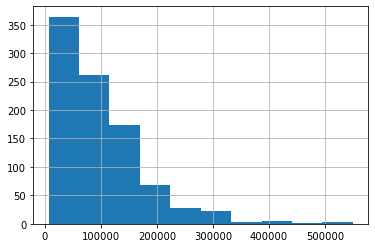

In [30]:
df.basePrice.hist()

# Пробуем простую модель, которая предсказывает среднюю цену

In [42]:
mean_price = 0
def train_dummy(X, y):
    global mean_price
    mean_price = np.mean(y)

In [43]:
train_dummy(X_train, y_train)

In [44]:
mean_price

98371.50402144772

In [47]:
def predict_dummy(X):
    return np.repeat(mean_price, X.shape[0])

In [49]:
y_pred_train = predict_dummy(X_train)
y_pred_test = predict_dummy(X_test)

print(f"RMSE train = {mean_squared_error(y_train, y_pred_train) ** 0.5}")
print(f"RMSE test  = {mean_squared_error(y_test, y_pred_test) ** 0.5}")

RMSE train = 76179.38811265034
RMSE test  = 81908.41795934962
